Neha Nilesh Gode

UID:2021300039

Dataset link: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv

In [1]:
# Install and load required packages
install.packages(c("ggplot2", "dplyr", "tidyr", "wordcloud", "plotly", "GGally"))
library(ggplot2)
library(dplyr)
library(tidyr)
library(wordcloud)
library(plotly)
library(GGally)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cards’, ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘lazyeval’, ‘crosstalk’, ‘ggstats’, ‘plyr’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: RColorBrewer


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
data <- read.csv('housing_data.csv')

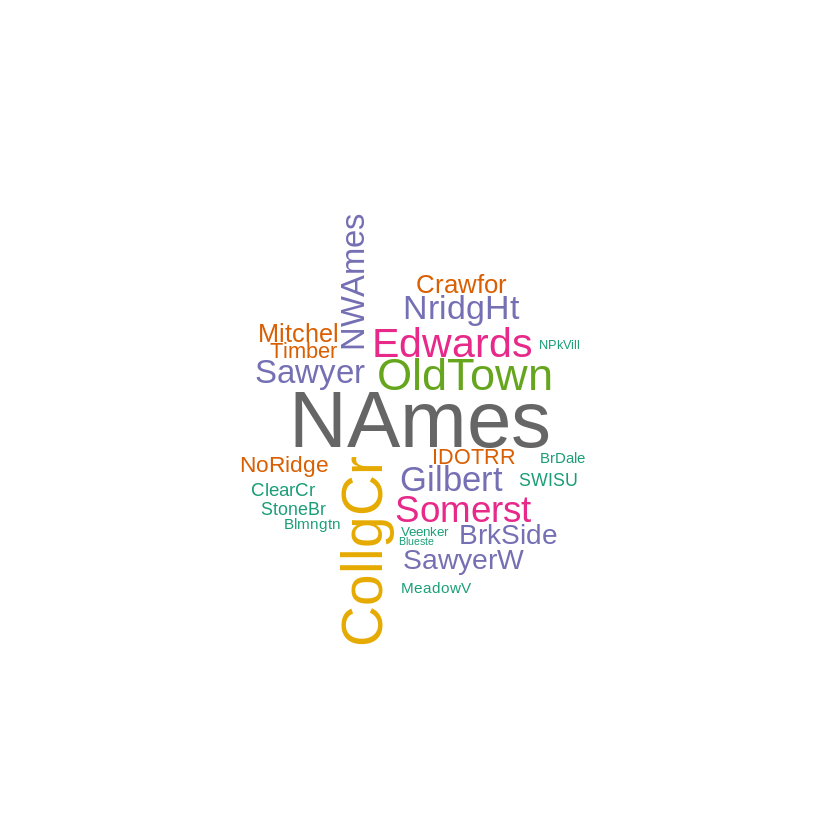

In [3]:
# 1. Word chart (Word Cloud)
neighborhood_freq <- table(data$Neighborhood)
wordcloud(words = names(neighborhood_freq), freq = neighborhood_freq, min.freq = 1, random.order = FALSE, colors = brewer.pal(8, "Dark2"))


Observation:

This word cloud provides a quick visual summary of the neighborhood distribution in the dataset, highlighting which areas are most represented and the diversity of locations included in the study.
The placement of "NAmes" in the center and its large size suggests it might be a central or particularly significant neighborhood in the context of this housing data.

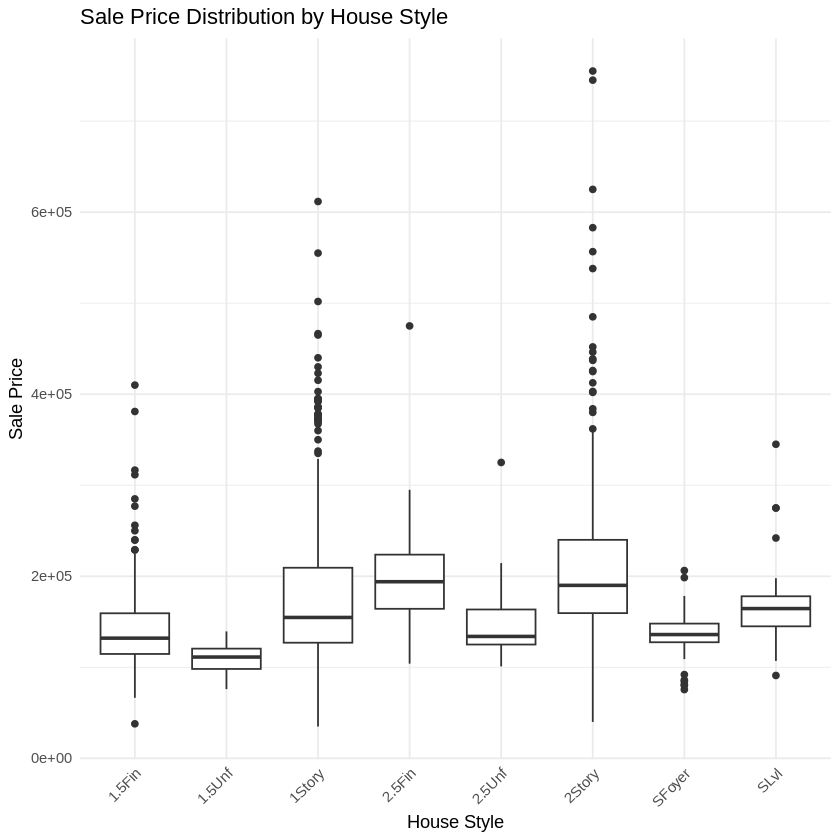

In [4]:
# 2. Box and Whisker plot
ggplot(data, aes(x = HouseStyle, y = SalePrice)) +
  geom_boxplot() +
  labs(title = "Sale Price Distribution by House Style", x = "House Style", y = "Sale Price") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Observation:

The median sale prices (represented by the horizontal line in each box) vary across different house styles. 2Story houses appear to have the highest median price, followed closely by 2.5Fin.Despite differences in medians, there's significant overlap in price ranges across all styles, indicating that factors other than house style also influence price.

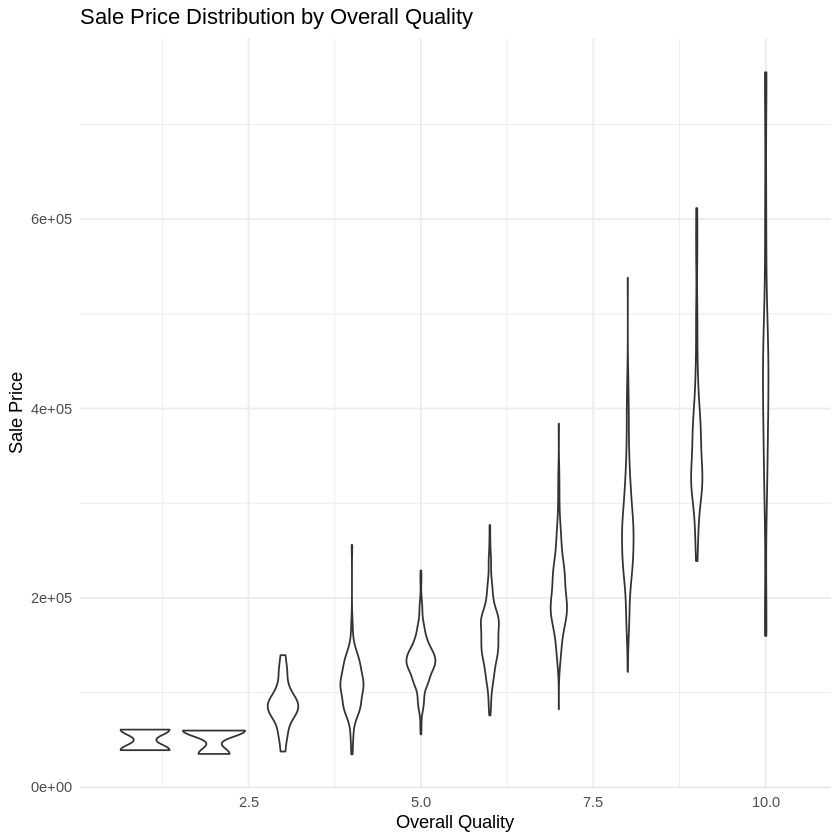

In [5]:
# 3. Violin plot
ggplot(data, aes(x = OverallQual, y = SalePrice, group = OverallQual)) +
  geom_violin() +
  labs(title = "Sale Price Distribution by Overall Quality", x = "Overall Quality", y = "Sale Price") +
  theme_minimal()

Observation:

There's a clear positive relationship between overall quality and sale price. As the quality rating increases, the median and range of sale prices tend to increase as well.Some quality levels (especially in the middle range) show bimodal distributions, suggesting two distinct price clusters within the same quality rating.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


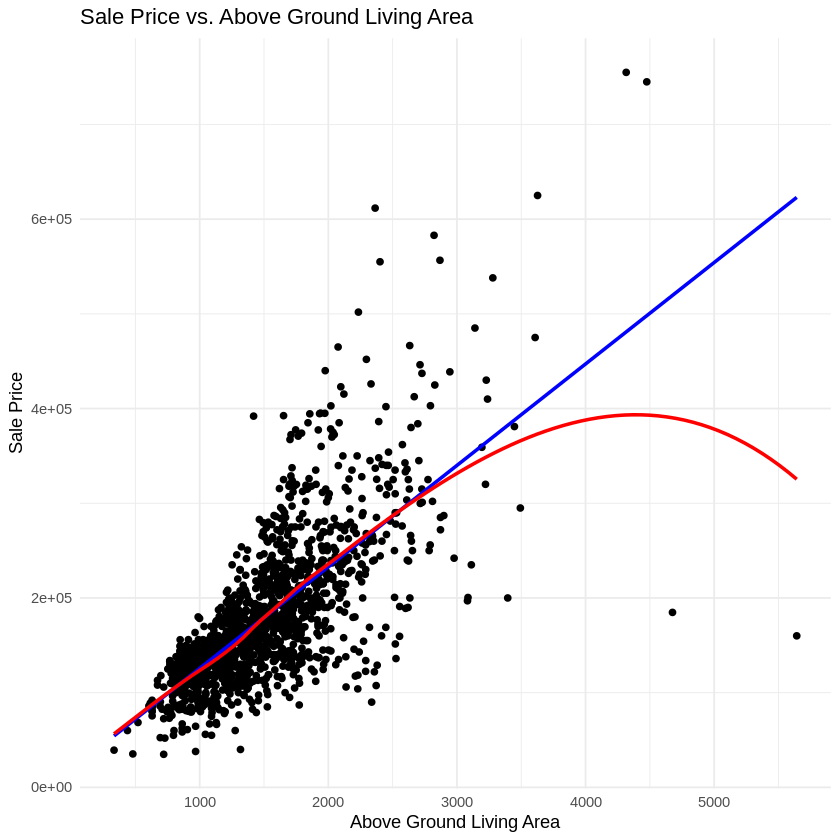

In [6]:
# 4. Regression plot (linear and nonlinear)
ggplot(data, aes(x = GrLivArea, y = SalePrice)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  geom_smooth(method = "loess", se = FALSE, color = "red") +
  labs(title = "Sale Price vs. Above Ground Living Area", x = "Above Ground Living Area", y = "Sale Price") +
  theme_minimal()

 Observation:

 There's a clear positive relationship between the above ground living area and sale price. As the living area increases, the sale price tends to increase as well.The red curve (loess smoothing) suggests a non-linear relationship. The rate of price increase appears to be steeper for smaller living areas and gradually levels off for larger areas. There are several high-priced outliers, particularly for homes with larger living areas.